In [58]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
import ji_ji_prime_method2


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.



# Probalility distribution of X of PBH binaries without and with halos for PBHs 
# mass range of m_min M☉ - m_max M☉ .
        
def P_X(m_1, m_2, Δ_1, Δ_2, t_m, X):
    
    if  m_1 < m_min:  
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))

        return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)

In [59]:
def P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence):
    
    if m_1 < m_min:
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        def f_(m):
            return f * P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
         
        
        
        if DM_halos_presence == 'False':
            
            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

            
            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
            return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) 
            
        
        else:
            
            beta = 0.75
            gamma  =  0.65
            delta = -0.89
            m1_ref = 1      # in units of solar mass.
            m2_ref = 1e-3   # in units of solar mass.

            m = file['arr_0']
            b = file['arr_1']
            a_i_ref = file['arr_2']  # in units of pc
            ji_ref_list = file['arr_3']
            tm_ref_list = file['arr_4']
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            C_list = (C(m_1,m_2,Δ_1,Δ_2, X)).tolist()
            j_initial_list = np.zeros(len(C_list))
            j_initial_prime_list  = np.zeros(len(C_list))
            
            
            
            for i, C in enumerate(C_list):
                variable = t_m/C
                
                if variable <= tm_ref_list[0]:
                    
                    j_i = ji_ji_prime_method2.ji_into_C_fitting_function(m, b, t_m) / (C**(1/m))   # t_m = (j_i**m) * (10**b)
                    j_i_prime = ji_ji_prime_method2.ji_into_C_prime_fitting_function(m, b, t_m) / (C**(1/m)) 
                    
                    
                elif tm_ref_list[0] < variable < tm_ref_list[-1]:
                    
                    
                    x = tm_ref_list
                    y = ji_ref_list
                    j_i = ji_ji_prime_method2.ji_interpolation(x, y, variable)
                    j_i_prime = ji_ji_prime_method2.ji_prime_into_C_interpolation(x, y, variable) / C
                    
                        
                
                else: 
                    j_i =   1   #Used as 1 instead of zero to avoid the divide by zero error in the integrand.                        
                    j_i_prime =   0                      
                   
                
                j_initial_list[i]       =  j_i
                j_initial_prime_list[i] =  j_i_prime
                
            
            j_initial = np.array(j_initial_list) 
            j_initial_prime = np.array(j_initial_prime_list)
            
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_initial/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            return (j_initial_prime/j_initial) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
            


In [60]:
def P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence):
    
    if m_1 < m_min:
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        def f_(m):
            return f * P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
         
        
        
        if DM_halos_presence == 'False':
            
            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

            
            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
            
       
            return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) *  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)
        
            
            
        
        else:
            
            beta = 0.75
            gamma  =  0.65
            delta = -0.89
            m1_ref = 1      # in units of solar mass.
            m2_ref = 1e-3   # in units of solar mass.

            m = file['arr_0']
            b = file['arr_1']
            a_i_ref = file['arr_2']  # in units of pc
            ji_ref_list = file['arr_3']
            tm_ref_list = file['arr_4']
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            C_list = (C(m_1,m_2,Δ_1,Δ_2, X)).tolist()
            j_initial_list = np.zeros(len(C_list))
            j_initial_prime_list  = np.zeros(len(C_list))
            
            
            
            for i, C in enumerate(C_list):
                variable = t_m/C
                
                if variable <= tm_ref_list[0]:
                    
                    j_i = ji_ji_prime_method2.ji_into_C_fitting_function(m, b, t_m) / (C**(1/m))   # t_m = (j_i**m) * (10**b)
                    j_i_prime = ji_ji_prime_method2.ji_into_C_prime_fitting_function(m, b, t_m) / (C**(1/m)) 
                    
                    
                elif tm_ref_list[0] < variable < tm_ref_list[-1]:
                    
                    
                    x = tm_ref_list
                    y = ji_ref_list
                    j_i = ji_ji_prime_method2.ji_interpolation(x, y, variable)
                    j_i_prime = ji_ji_prime_method2.ji_prime_into_C_interpolation(x, y, variable) / C
                    
                
                else: 
                    j_i =   1   #Used as 1 instead of zero to avoid the divide by zero error in the integrand.                        
                    j_i_prime =   0                      
                   
                
                j_initial_list[i]       =  j_i
                j_initial_prime_list[i] =  j_i_prime
                
            
            j_initial = np.array(j_initial_list) 
            j_initial_prime = np.array(j_initial_prime_list)
            
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_initial/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            return (j_initial_prime/j_initial) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            


In [61]:
m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [62]:
# Choosing the range of PBH mass function from m_min = 5 M☉ - 100 M☉.

m_1 = m_1_list[-1]            # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_2_list[0]           # in units of M☉
 
Δ_2 = Δ_2_list[0]  


m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-8
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 5 - 100 solar mass.

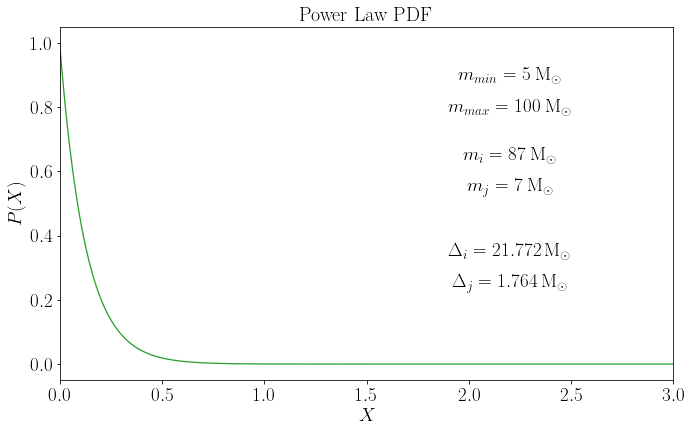

In [63]:
# P(X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 3.31e-3
f =  0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
   


plt.text(2.2, 0.9, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.2, 0.8, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.2, 0.65, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.2, 0.55, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.2, 0.35, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.2, 0.25, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title('Power Law PDF ', fontsize = 20)
plt.savefig('1imP_X.pdf', bbox_inches = 'tight')
plt.show()

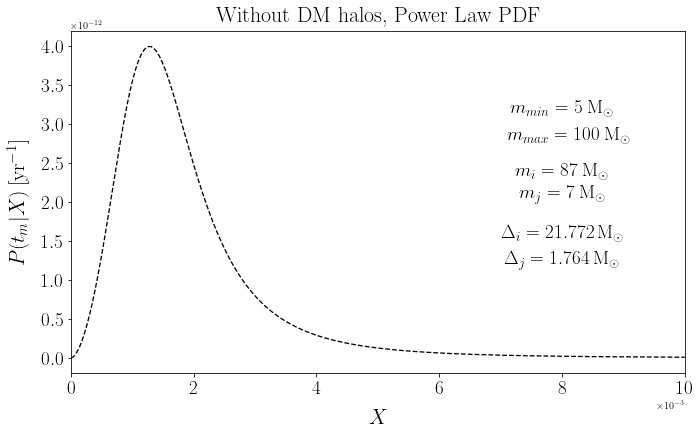

In [64]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.3))


f_pbh= 3.31e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5    #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))


plt.text(8e-3, 3.2e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.1e-3, 2.85e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-3, 2.4e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(8e-3, 2.1e-12, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-3, 1.6e-12, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8e-3, 1.25e-12, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 1e-2)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1imaPWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

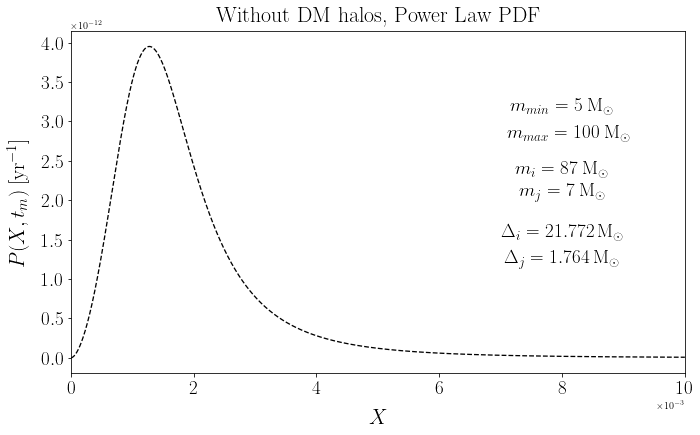

In [65]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.3))


f_pbh= 3.31e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5    #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))


plt.text(8e-3, 3.2e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.1e-3, 2.85e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-3, 2.4e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(8e-3, 2.1e-12, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-3, 1.6e-12, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8e-3, 1.25e-12, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 1e-2)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1imaPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

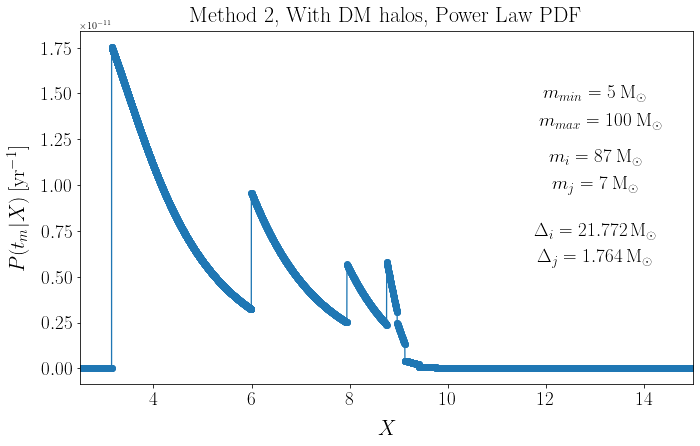

In [66]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))



f_pbh = 3.31e-3
f= 0.85 * f_pbh
      
       
        
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )

plt.text(13, 1.5e-11, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(13.1, 1.35e-11, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(13, 1.15e-11, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(13, 1e-11, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(13, 0.75e-11, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(13, 0.6e-11, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(2.5, 15)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1imbPWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

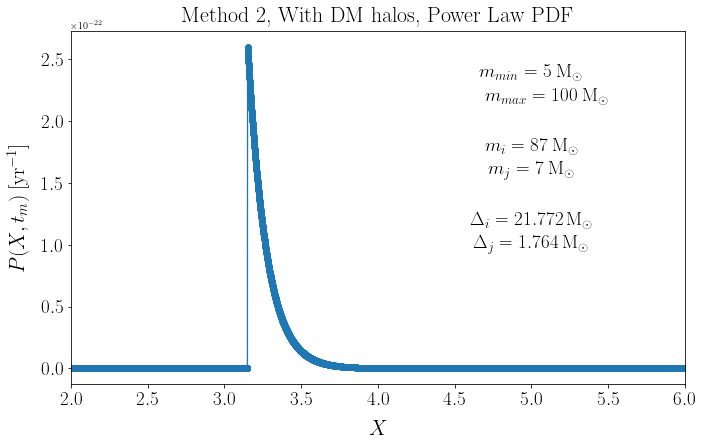

In [67]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))



f_pbh = 3.31e-3
f= 0.85 * f_pbh
      
       
        
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )

plt.text(5, 2.4e-22, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5.1, 2.2e-22, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5, 1.8e-22, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(5, 1.6e-22, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5, 1.2e-22, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5, 1e-22, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")





plt.xlim(2, 6)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X,t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1imbPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

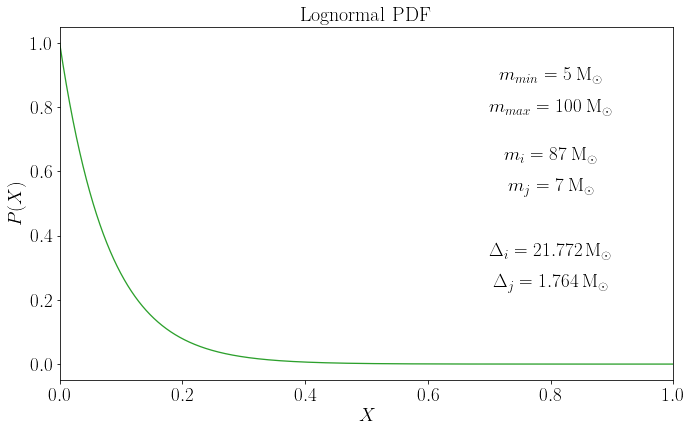

In [68]:
# P(X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 2.10e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
   
plt.text(0.8, 0.9, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.8, 0.8, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.8, 0.65, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(0.8, 0.55, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.8, 0.35, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.8, 0.25, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 1)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title('Lognormal PDF ', fontsize = 20)
plt.savefig('2imP_X.pdf', bbox_inches = 'tight')
plt.show()

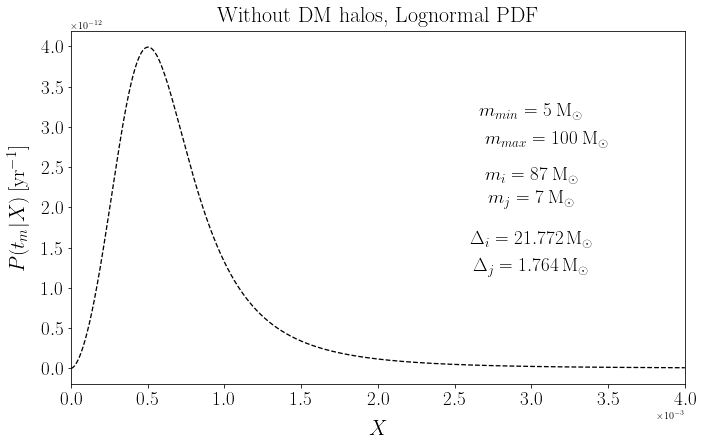

In [69]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.


file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))

f_pbh = 2.10e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--' )
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3)) 


plt.text(3e-3, 3.2e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(3.1e-3, 2.85e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(3e-3, 2.4e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(3e-3, 2.1e-12, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(3e-3, 1.6e-12, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(3e-3, 1.25e-12, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 4e-3)
#plt.ylim(1.1e-100, 1e-12)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1imaLgnmlP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

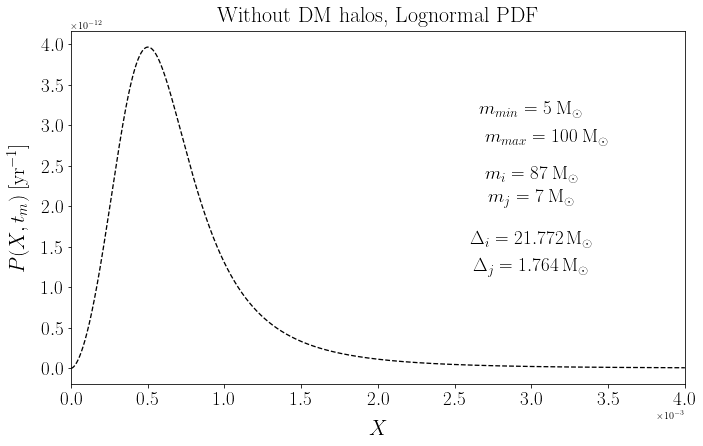

In [70]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.


file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))

f_pbh = 2.10e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--' )
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3)) 


plt.text(3e-3, 3.2e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(3.1e-3, 2.85e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(3e-3, 2.4e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(3e-3, 2.1e-12, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(3e-3, 1.6e-12, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(3e-3, 1.25e-12, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 4e-3)
#plt.ylim(1.1e-100, 1e-12)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X,t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1imaLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

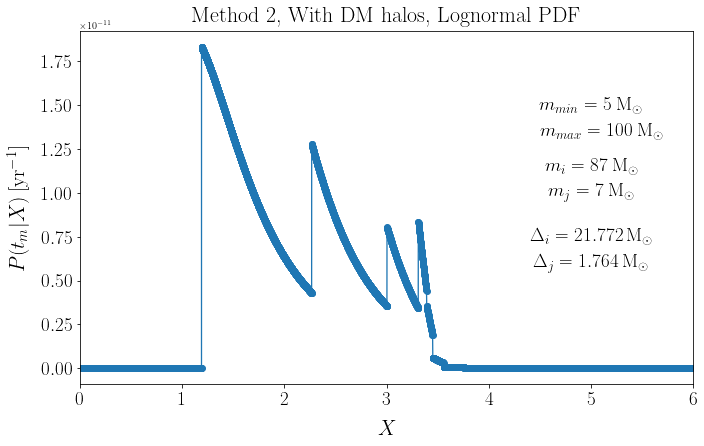

In [71]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.


file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))

f_pbh = 2.10e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )
#plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3)) 


plt.text(5, 1.5e-11, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5.1, 1.35e-11, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5, 1.15e-11, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(5, 1e-11, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5, 0.75e-11, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5, 0.6e-11, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 6)
#plt.ylim(1.1e-100, 1e-12)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1imbLgnmlP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

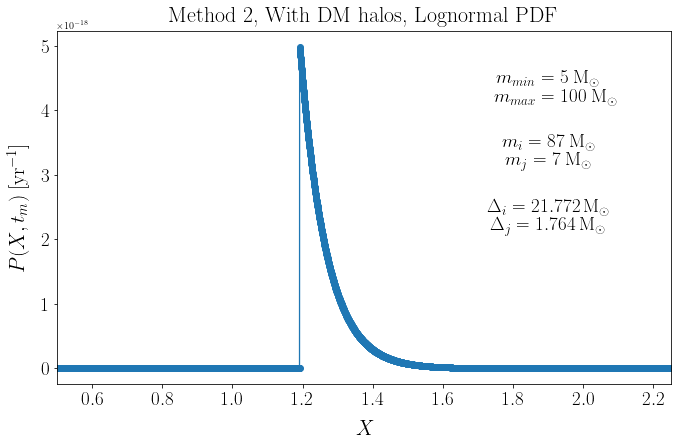

In [72]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.


file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))

f_pbh = 2.10e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )
#plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3)) 


plt.text(1.9, 4.5e-18, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.92, 4.2e-18, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.9, 3.5e-18, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(1.9, 3.2e-18, r"$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.9, 2.5e-18, r"$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.9, 2.2e-18, r"$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")







plt.xlim(0.5, 2.25)
#plt.ylim(1.1e-100, 1e-12)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X,t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1imbLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

In [73]:
bin_centres = np.geomspace(2e-3, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-3, 96, 11)
m_2 = np.geomspace(2e-3, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
    


# To save some time I wrote them by hand.
m_1_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] 
m_2_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96]


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_1 = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] M☉

Δ_1 = [0.00226168, 0.00664593, 0.01952898, 0.05738571, 0.16862729, 0.49550949, 1.45604937, 4.27858558, 12.57257825, 36.94438751, 108.56068991]


In [74]:
m_1 = m_1_list[-1]           # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0] 


m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000)

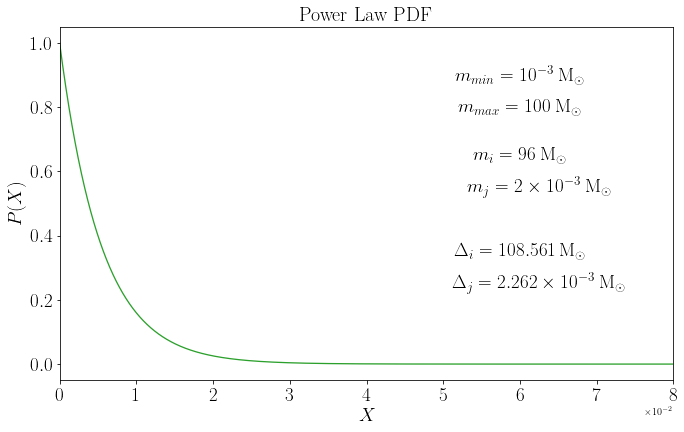

In [77]:
# P(X) in range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 6.17e-5
f =  0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
   

plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))   



plt.text(6e-2, 0.9, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6e-2, 0.8, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(6e-2, 0.65, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(6.25e-2, 0.55, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(6e-2, 0.35, r"$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.25e-2, 0.25, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 0.08)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title('Power Law PDF ', fontsize = 20)
plt.savefig('3imP_X.pdf', bbox_inches = 'tight')
plt.show()

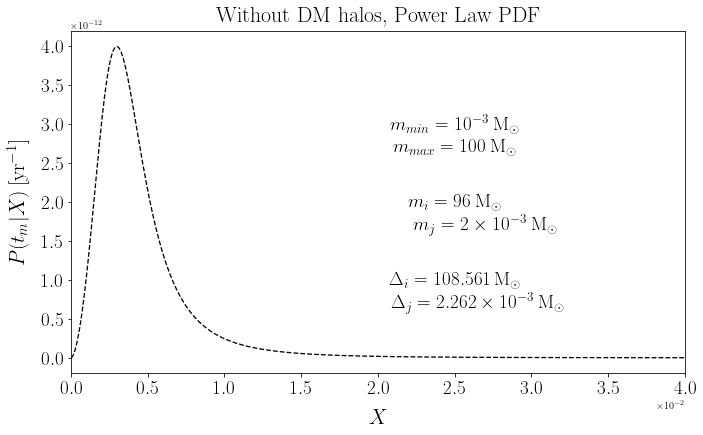

In [78]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.



plt.figure(figsize = (11, 6.3))


f_pbh= 6.17e-5
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')


plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))

plt.text(2.5e-2, 3e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.5e-2, 2.7e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.5e-2, 2e-12, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.7e-2, 1.7e-12, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.5e-2, 1e-12, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.65e-2, 0.7e-12, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 4e-2)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imaPWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

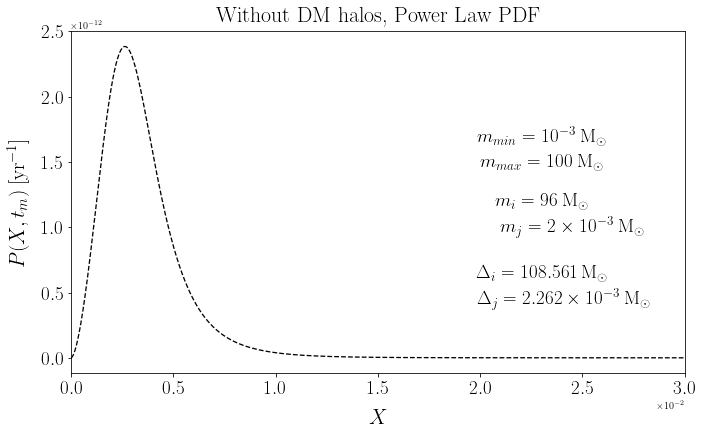

In [79]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.3))


f_pbh= 6.17e-5
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')


plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))

plt.text(2.3e-2, 1.7e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.3e-2, 1.5e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.3e-2, 1.2e-12, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.45e-2, 1e-12, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.3e-2, 0.65e-12, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.41e-2, 0.45e-12, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 3e-2)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imaPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

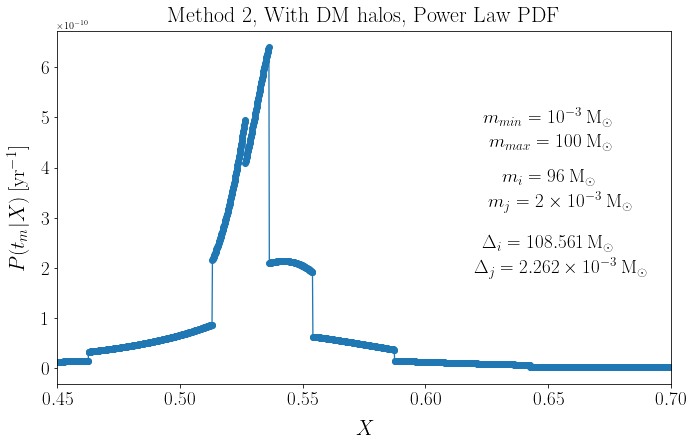

In [80]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))



f_pbh = 6.17e-5
f= 0.85 * f_pbh
      
       
        
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )


plt.text(0.65, 5e-10, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.651, 4.5e-10, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.65, 3.8e-10, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(0.655, 3.3e-10, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.65, 2.5e-10, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.655, 2e-10, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0.45, 0.7)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imbPWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

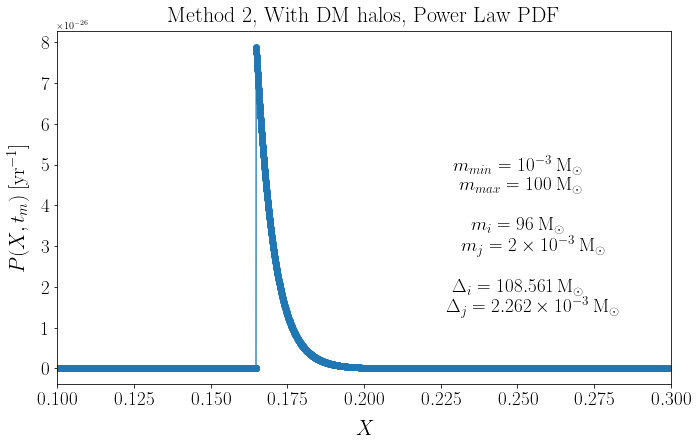

In [82]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

file = np.load('tm_ofj0_PWRhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))



f_pbh = 6.17e-5
f= 0.85 * f_pbh
      
       
        
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3    #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), '-o' )

plt.text(0.25, 5e-26, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.251, 4.5e-26, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.25, 3.5e-26, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(0.255, 3e-26, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.25, 2e-26, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.255, 1.5e-26, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0.1, 0.3)
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X,t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imbPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

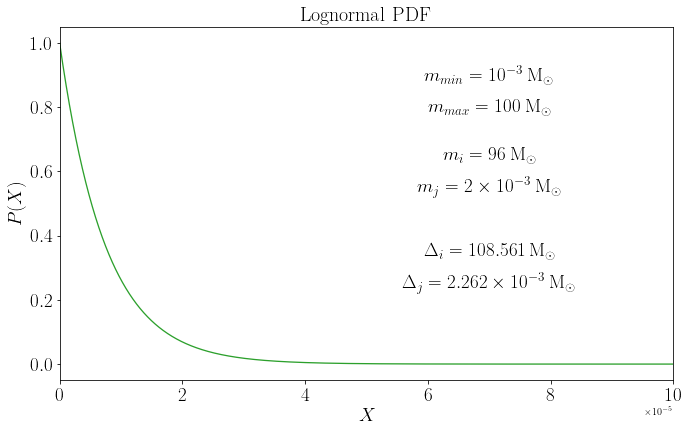

In [83]:
# P(X) in range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 1.67e-3
f  = 0.85 * f_pbh 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-5,-5))
  
plt.text(7e-5, 0.9, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(7e-5, 0.8, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(7e-5, 0.65, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(7e-5, 0.55, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(7e-5, 0.35, r"$\Delta_{i} = 108.561 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(7e-5, 0.25, r"$\Delta_{j} = 2.262\times 10^{-3}\: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 1e-4)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title('Lognormal PDF ', fontsize = 20)
plt.savefig('4imP_X.pdf', bbox_inches = 'tight')
plt.show()

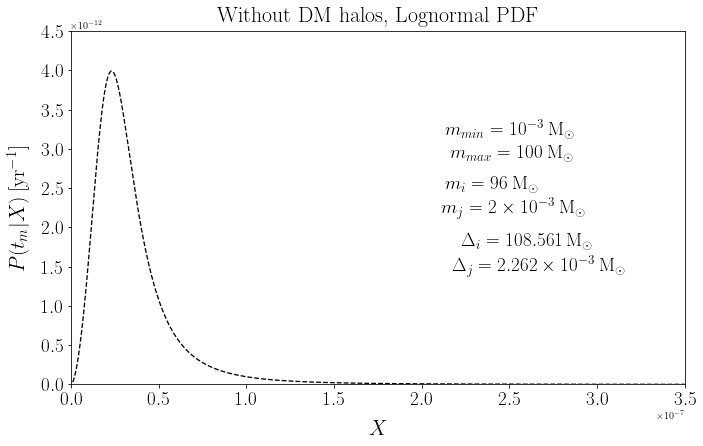

In [84]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))

   
f_pbh= 1.67e-3
f = 0.85 * f_pbh
     
        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False'), 'k--')


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(2.5e-7, 3.25e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.51e-7, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.4e-7, 2.55e-12, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.52e-7, 2.25e-12, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.6e-7, 1.82e-12, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.67e-7, 1.51e-12, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 3.5e-7)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2imaLgnmlP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

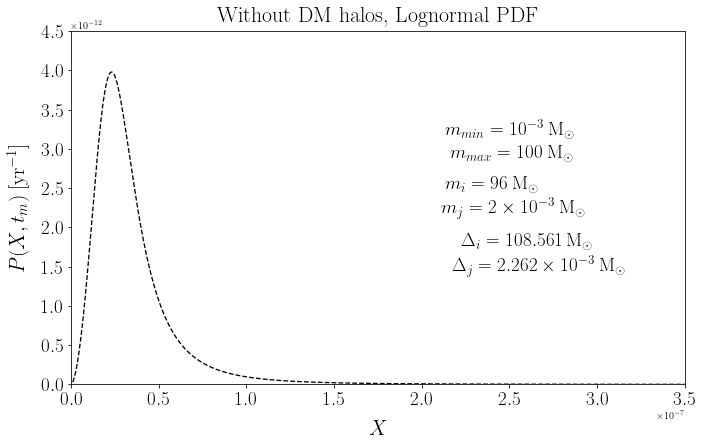

In [85]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))

   
f_pbh= 1.67e-3
f = 0.85 * f_pbh
     
        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'False'), 'k--')


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(2.5e-7, 3.25e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.51e-7, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.4e-7, 2.55e-12, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.52e-7, 2.25e-12, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.6e-7, 1.82e-12, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.67e-7, 1.51e-12, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 3.5e-7)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X,t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Without DM halos, Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2imaLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

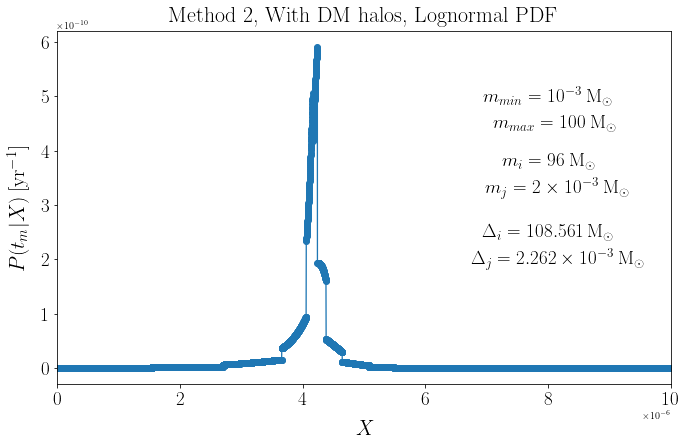

In [88]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

file = np.load('tm_ofj0_Lgnmlhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']



plt.figure(figsize = (11, 6.5))

   
f_pbh= 1.67e-3
f = 0.85 * f_pbh
     
        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'True'), '-o')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-6, -6))



plt.text(8e-6, 5e-10, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.1e-6, 4.5e-10, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-6, 3.8e-10, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(8.15e-6, 3.3e-10, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-6, 2.5e-10, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.15e-6, 2e-10, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 1e-5)
plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2imbLgnmlP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

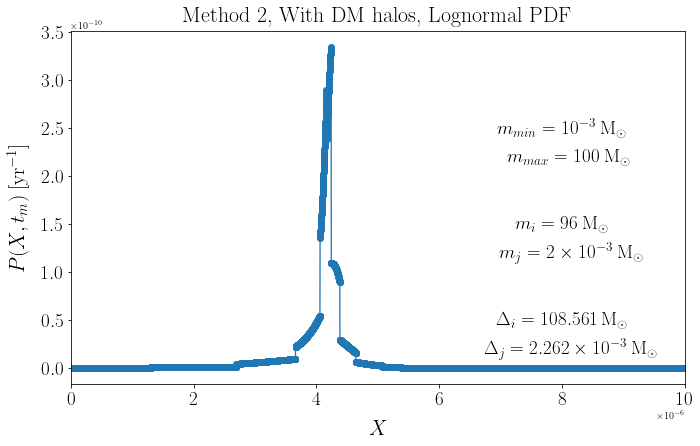

In [89]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


plt.figure(figsize = (11, 6.5))

   
f_pbh= 1.67e-3
f = 0.85 * f_pbh
     
        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_method_2(m_1, m_2, Δ_1, Δ_2, t_m, X,  DM_halos_presence = 'True'), '-o')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-6, -6))



plt.text(8e-6, 2.5e-10, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.1e-6, 2.2e-10, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-6, 1.5e-10, "$m_{i} = 96 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(8.15e-6, 1.2e-10, r"$m_{j} = 2 \times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-6, 0.5e-10, "$\Delta_{i} = 108.561\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.15e-6, 0.2e-10, r"$\Delta_{j} = 2.262\times 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 1e-5)
plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.title('Method 2, With DM halos, Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2imbLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()